# Problem Statement 2:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

# Dataset Information:
The online_retail.csv contains 387961 rows and 8 columns.


In [2]:
!pip install pandas-profiling
! pip install ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
import ydata_profiling

# Exploratory Data Analysis (EDA):
- Check data types, missing values, and handle them

- Explore numerical variables (e.g., Quantity, Price)

- Analyze categorical variables (e.g., Country)

In [6]:
data = pd.read_csv('OnlineRetail (3).csv',encoding='latin-1')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
profile = ProfileReport(data)

In [8]:
# Open an interactive report in Jupyter Notebook
profile.to_widgets()

# Save the report to an HTML file
profile.to_file("OnlineRetail_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile

In [10]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isna().sum()
data.shape

(406829, 8)

In [12]:
data.duplicated().sum()

5225

In [13]:
data.drop_duplicates(inplace=True)
print('duplicates in the data set  :',data.duplicated().sum())
data.shape

duplicates in the data set  : 0


(401604, 8)

<Axes: ylabel='Density'>

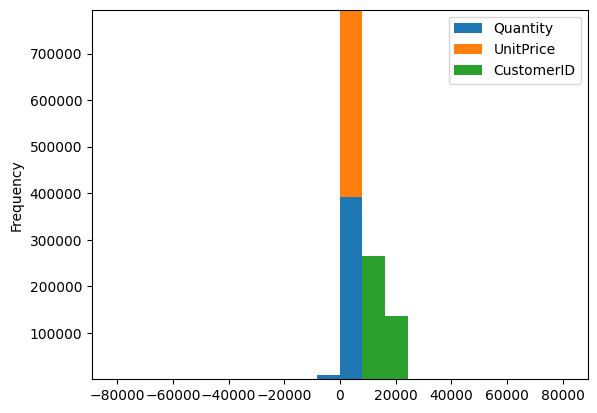

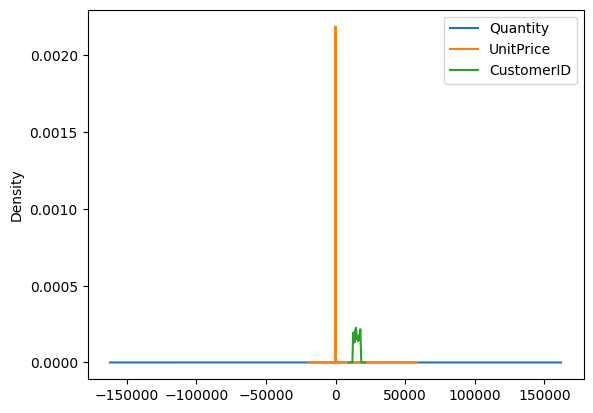

In [14]:
data.plot.hist(bins=20,stacked=True)
data.plot.kde()

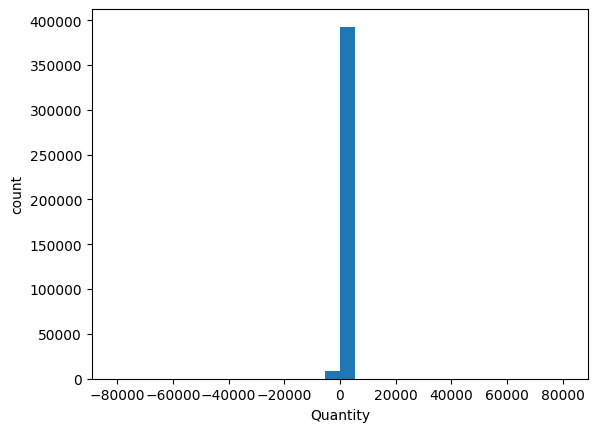

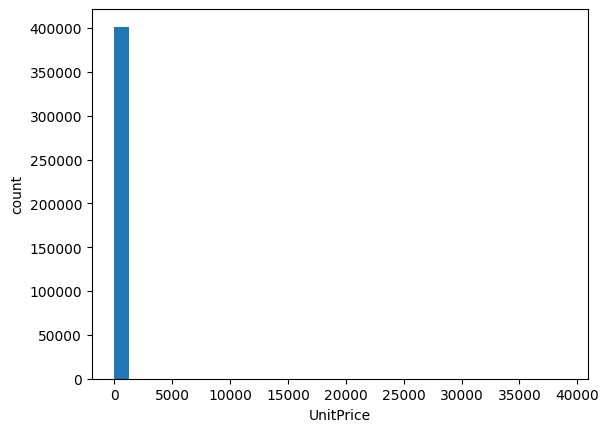

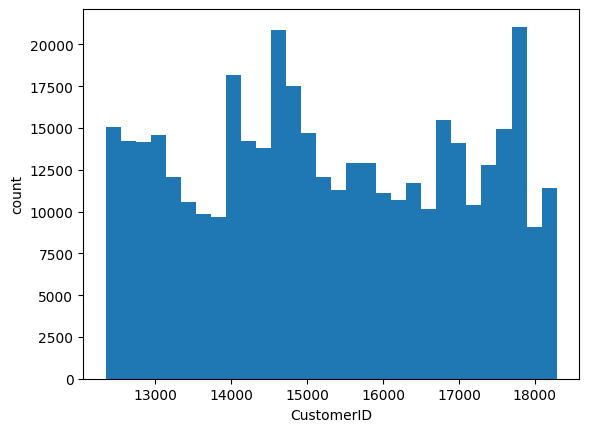

In [15]:
col=data.columns
for i in col:
    if(data[i].dtypes=='int64' or data[i].dtypes=='float64'):
        plt.hist(data[i],bins=30)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

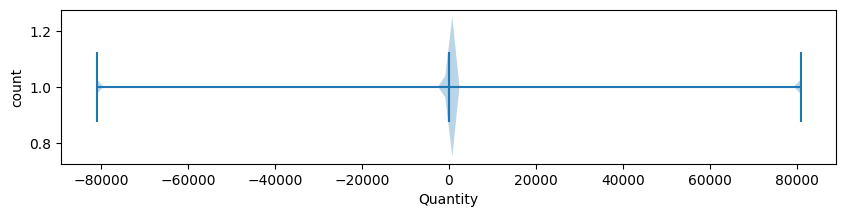

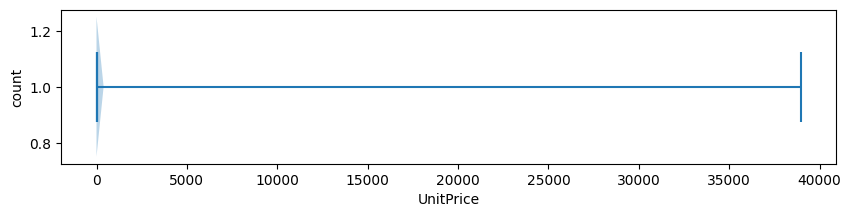

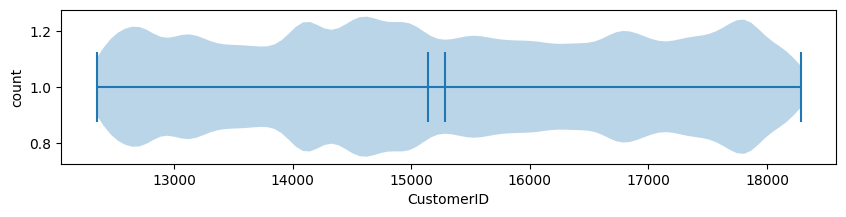

In [16]:
col=data.columns
for i in col:
    if(data[i].dtypes=='int64' or data[i].dtypes=='float64'):
        
        plt.figure(figsize=(10,2))
       
        plt.violinplot(data[i],vert=False,showmeans=True,showmedians=True)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

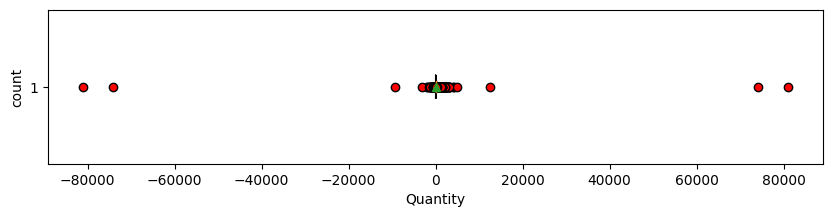

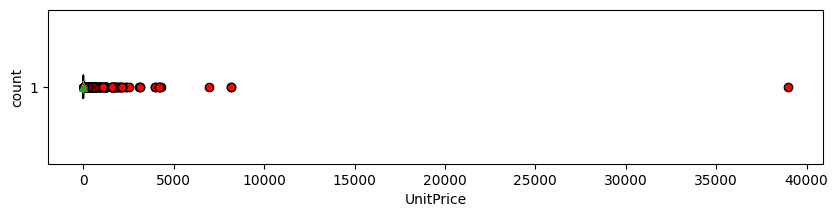

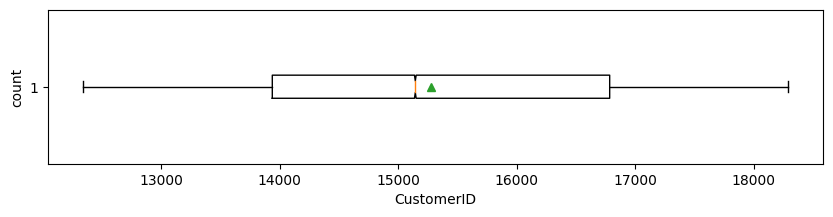

In [17]:
for i in col:
    if(data[i].dtypes=='int64' or data[i].dtypes=='float64'):
        plt.figure(figsize=(10,2))
        red_circle = dict(markerfacecolor='red', marker='o')
        plt.boxplot(data[i],vert=False,notch=True,showmeans=True,flierprops=red_circle)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [18]:
data[data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [19]:
data[~data['InvoiceNo'].str.contains('C')].shape


(392732, 8)

In [20]:
data =data[~data['Quantity'] < 0 ]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [21]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
for name in data.columns:
    print(f"column {name} has {len(set(data.loc[:,name]))} unique values")

column InvoiceNo has 18536 unique values
column StockCode has 3665 unique values
column Description has 3877 unique values
column Quantity has 302 unique values
column InvoiceDate has 17286 unique values
column UnitPrice has 441 unique values
column CustomerID has 4339 unique values
column Country has 37 unique values


In [23]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
# Extract number and character from stock code column
data['Code'] = data['StockCode'].str.extract(r'(\d+)')
data['Type'] = data['StockCode'].str.extract(r'([A-Za-z])')

print(data['Code'].nunique())
print(data['Code'].unique())
#data=pd.concat([df1,data] ,axis=1)
print('Types=',data['Type'].nunique())
print(data['Type'].unique())

C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\3659045528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Code'] = data['StockCode'].str.extract(r'(\d+)')
C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\3659045528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = data['StockCode'].str.extract(r'([A-Za-z])')


3194
['85123' '71053' '84406' ... '23561' '90089' '23843']
Types= 24
['A' nan 'B' 'G' 'E' 'P' 'L' 'C' 'S' 'N' 'D' 'F' 'T' 'H' 'M' 'R' 'K' 'V'
 'J' 'W' 'U' 'Y' 'I' 'O' 'Z']


In [25]:
data.shape
data['Type']=data['Type'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,
                               'P':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'Y':23,'Z':24})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
 8   Code         391316 non-null  object 
 9   Type         34423 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 33.0+ MB


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\3864475706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type']=data['Type'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,


In [26]:
data['Code'] = data['Code'].fillna(data['Code'].mode()[0])

C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\4031022852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Code'] = data['Code'].fillna(data['Code'].mode()[0])


In [27]:
data['Type'] = data['Type'].fillna(data['Type'].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
 8   Code         392732 non-null  object 
 9   Type         392732 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 33.0+ MB


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\3704395782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = data['Type'].fillna(data['Type'].mode()[0])


In [28]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Code           0
Type           0
dtype: int64

In [29]:
# Changing the Data Type of the Attributes:
data['Code']=data['Code'].astype(int)
data['InvoiceNo']=data['InvoiceNo'].astype(int)
data['Type']=data['Type'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int32  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
 8   Code         392732 non-null  int32  
 9   Type         392732 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 28.5+ MB


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\195472139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Code']=data['Code'].astype(int)
C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\195472139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceNo']=data['InvoiceNo'].astype(int)
C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\195472139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [30]:
countries=data['Country'].unique()
print(countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [31]:
for column in data.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:")
    print(data[column].nunique())
    print()

Unique values in StockCode:
3665

Unique values in Description:
3877

Unique values in InvoiceDate:
17286

Unique values in Country:
37



In [32]:
print(f"there are {data.shape[0]} rows")


for name in data.columns:
    print(f"column {name} has {len(set(data.loc[:,name]))} unique values")

there are 392732 rows
column InvoiceNo has 18536 unique values
column StockCode has 3665 unique values
column Description has 3877 unique values
column Quantity has 302 unique values
column InvoiceDate has 17286 unique values
column UnitPrice has 441 unique values
column CustomerID has 4339 unique values
column Country has 37 unique values
column Code has 3194 unique values
column Type has 24 unique values


In [33]:
# - Explore numerical variables (e.g., Quantity, Price.....)
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Code,Type
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822,30957.664255,2.255133
std,13087.116747,181.588420,22.240725,1713.567773,20839.157088,1.737420
min,536365.000000,1.000000,0.000000,12346.000000,2.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,22029.000000,2.000000
50%,561874.000000,6.000000,1.950000,15150.000000,22667.000000,2.000000
75%,572061.000000,12.000000,3.750000,16791.000000,23283.000000,2.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,90214.000000,24.000000


In [34]:
# Define the mapping dictionary for encoding
mapping = {'A': 1, 'B': 2, 'C': 3}

# Encode the 'Type' column
data['EncodedType'] = data['Type'].replace(mapping)

print(data)


        InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country 

C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\3000033297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EncodedType'] = data['Type'].replace(mapping)


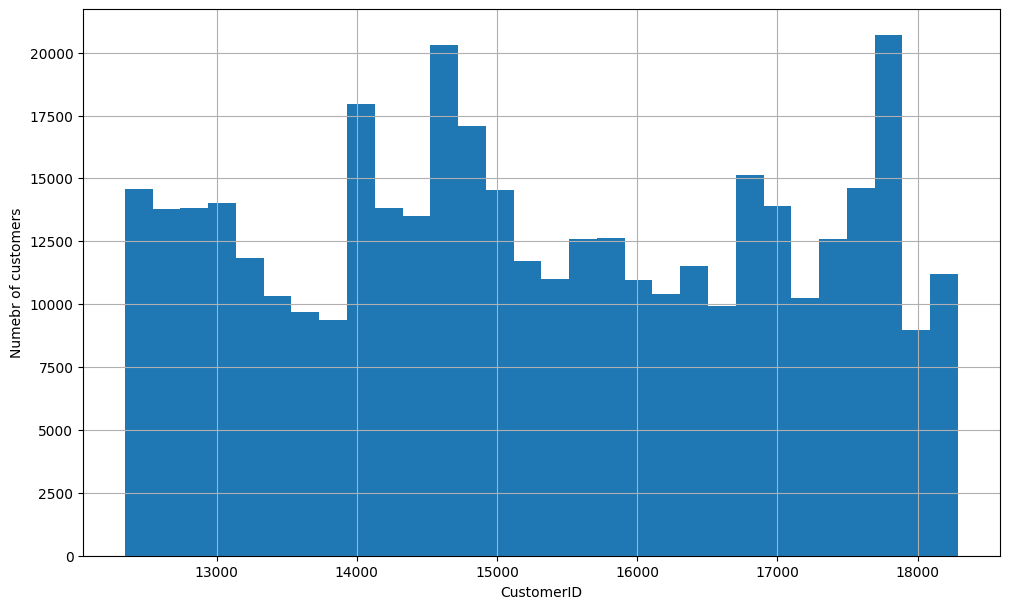

In [35]:
# Histograms
data['CustomerID'].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.xlabel('CustomerID')
plt.ylabel('Numebr of customers')
plt.show()

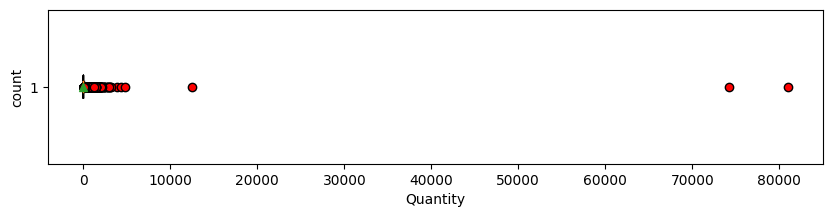

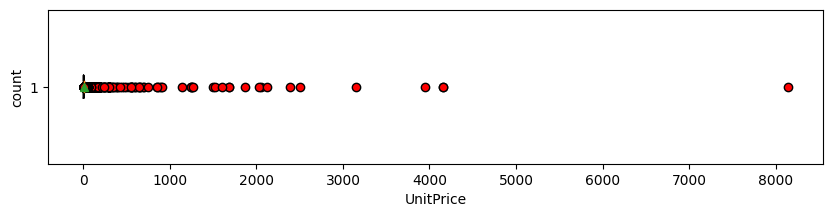

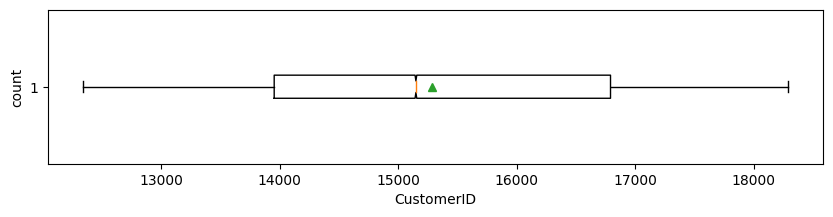

In [36]:
for i in col:
    if(data[i].dtypes=='int64' or data[i].dtypes=='float64'):
        plt.figure(figsize=(10,2))
        red_circle = dict(markerfacecolor='red', marker='o')
        plt.boxplot(data[i],vert=False,notch=True,showmeans=True,flierprops=red_circle)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

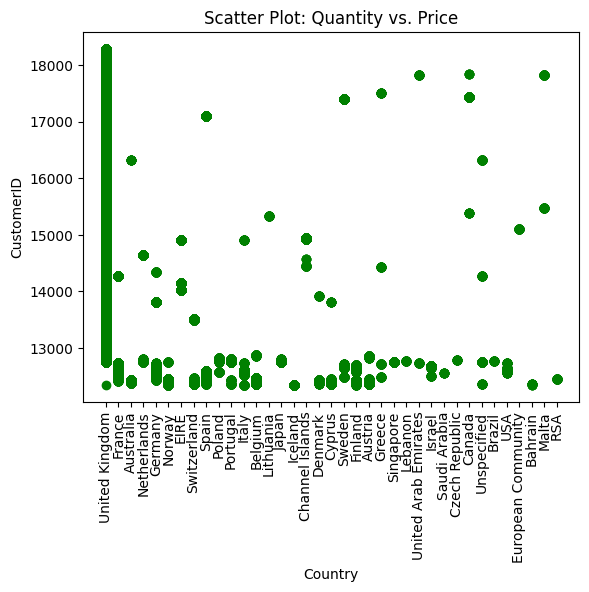

In [37]:
plt.scatter(data['Country'], data['CustomerID'],color='g')
plt.xlabel('Country')
plt.ylabel('CustomerID')
plt.xticks(rotation=90)
plt.title('Scatter Plot: Quantity vs. Price')
plt.show()


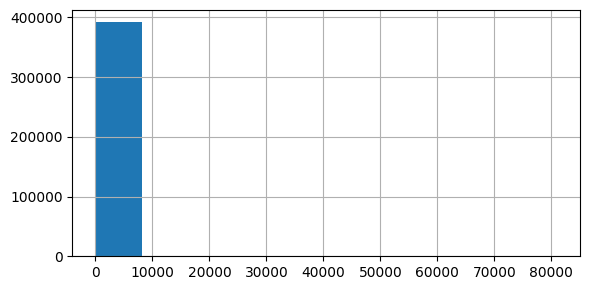

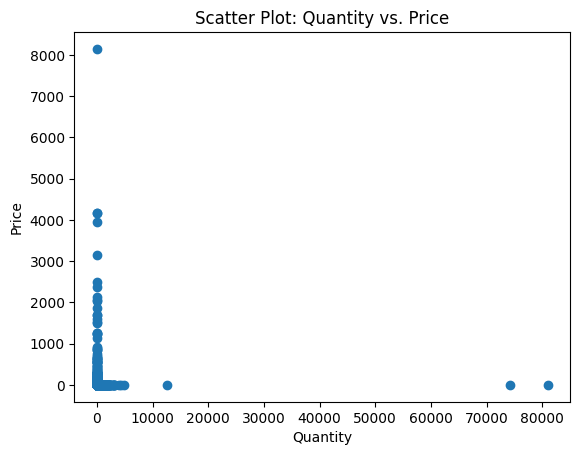

In [38]:
# Histograms
data['Quantity'].hist(bins=10, figsize=(6, 3))
plt.tight_layout()
plt.show()

# Scatter plot (Quantity vs. Price)
plt.scatter(data['Quantity'], data['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Scatter Plot: Quantity vs. Price')
plt.show()

# By EDA I has done the following analysis:

   - We are  knowing of  the data types of each column and handle any necessary data type conversions.
       
   - Knowing of  missing values and handle them appropriately (e.g., imputation or removal).
       
   - Ploted Explore the distribution of numerical variables (e.g., Quantity, Price) using descriptive statistics and visualizations.

   - We have analyze categorical variables (e.g., Country) to understand the distribution of customers across different regions.

# Providing  Insights and Recommendations
- Summarize findings from customer analysis and segmentation
- Identify key characteristics and preferences of each customer segment
- Highlight segments contributing most to revenue and customer base
- Provide actionable recommendations tailored to each segment

# Geographical Analysis:

In [39]:
geographical_analysis = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print("Geographical Analysis:")
print(geographical_analysis)
print()

Geographical Analysis:
Country
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore   

# Customer Analysis:
-  Calculating the  customer metrics (total purchases, average purchase value, etc.).
  - Identifing the  high-value customers in the given dataset.
  - Analyzing the  purchase frequency and customer loyalty.
  - Analyzing  customer distribution across  various countries.

Total  Quantities purchases by the Customer:
 CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
           ...  
18280.0       45
18281.0       54
18282.0      103
18283.0     1357
18287.0     1586
Name: Quantity, Length: 4339, dtype: int64

 Average Quantities purchases by the Customer:
 CustomerID
12346.0    74215.000000
12347.0       13.505495
12348.0       75.516129
12349.0        8.643836
12350.0       11.588235
               ...     
18280.0        4.500000
18281.0        7.714286
18282.0        8.583333
18283.0        1.882108
18287.0       22.657143
Name: Quantity, Length: 4339, dtype: float64
max= 197491
min  = 1
Average= 1190.5706383959437
std= 5053.1481603868


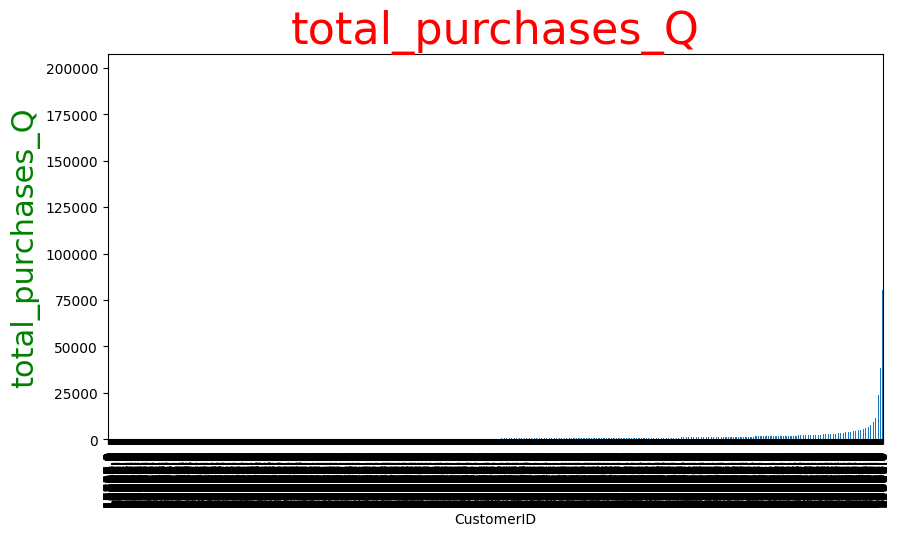

In [40]:
# Calculate total purchases per customer
total_purchases_Q = data.groupby('CustomerID')['Quantity'].sum()
avg_purchases_Q = data.groupby('CustomerID')['Quantity'].mean()
print("Total  Quantities purchases by the Customer:\n",total_purchases_Q)
print("\n Average Quantities purchases by the Customer:\n",avg_purchases_Q)

plt.figure(figsize=(10,5))
total_purchases_Q.sort_values().plot(kind='bar')
plt.title('total_purchases_Q',color='r',fontsize=32)
plt.ylabel('total_purchases_Q',color='g',fontsize=22)
plt.xticks(rotation=90)
print('max=',total_purchases_Q.max())
print('min  =',total_purchases_Q.min())
print('Average=',total_purchases_Q.mean())
print('std=',total_purchases_Q.std())


In [41]:
total_purchases_P = data.groupby('CustomerID')['UnitPrice'].sum()
avg_purchases_P = data.groupby('CustomerID')['UnitPrice'].mean()
print("Total  money spent on  purchases by the Customer:\n",total_purchases_P)
print("\n Average money spent on purchases by the Customer:\n",avg_purchases_P)



Total  money spent on  purchases by the Customer:
 CustomerID
12346.0       1.04
12347.0     481.21
12348.0     178.71
12349.0     605.10
12350.0      65.30
            ...   
18280.0      47.65
18281.0      39.36
18282.0      62.39
18283.0    1174.33
18287.0     104.55
Name: UnitPrice, Length: 4339, dtype: float64

 Average money spent on purchases by the Customer:
 CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
             ...   
18280.0    4.765000
18281.0    5.622857
18282.0    5.199167
18283.0    1.628752
18287.0    1.493571
Name: UnitPrice, Length: 4339, dtype: float64


In [42]:
# Calculate total spent per customer
total_spent = data.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
total_spent
avg_spent = data.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).mean())
avg_spent


CustomerID
12346.0    77183.600000
12347.0       23.681319
12348.0       57.975484
12349.0       24.076027
12350.0       19.670588
               ...     
18280.0       18.060000
18281.0       11.545714
18282.0       14.837500
18283.0        2.837074
18287.0       26.246857
Length: 4339, dtype: float64

In [43]:
unique_purchases = data.groupby('CustomerID')['InvoiceNo'].nunique()
unique_purchases

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4339, dtype: int64

customer_metrics_max total_purchases_Qty      197491.00
avg_purchases_Qty         74215.00
total_purchases_Price     33332.45
Avg_purchases_Price       33332.45
Total Spent              280206.02
avg_spent                 77183.60
Unique Purchases            210.00
dtype: float64
customer_metrics_min total_purchases_Qty      1.0
avg_purchases_Qty        1.0
total_purchases_Price    0.0
Avg_purchases_Price      0.0
Total Spent              0.0
avg_spent                0.0
Unique Purchases         1.0
dtype: float64
customer_metrics_avg total_purchases_Qty      1190.570638
avg_purchases_Qty          47.957236
total_purchases_Price     282.904214
Avg_purchases_Price       282.904214
Total Spent              2048.215924
avg_spent                  68.334729
Unique Purchases            4.271952
dtype: float64
customer_metrics_std total_purchases_Qty      5053.148160
avg_purchases_Qty        1218.158691
total_purchases_Price     875.427818
Avg_purchases_Price       875.427818
Total Spent     

<Figure size 3000x1000 with 0 Axes>

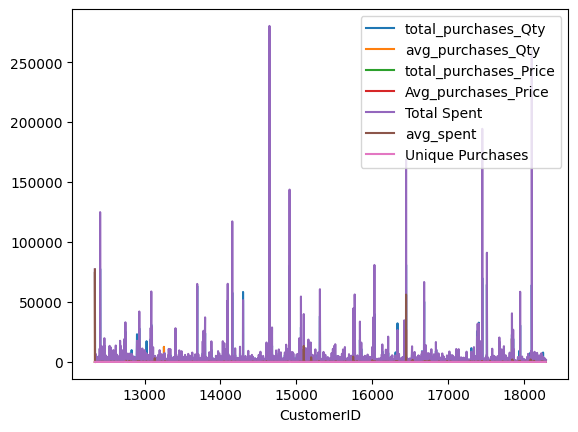

In [44]:
# Create a DataFrame to store the customer metrics
customer_metrics = pd.DataFrame({
    'total_purchases_Qty':total_purchases_Q,
    'avg_purchases_Qty':avg_purchases_Q,
    'total_purchases_Price': total_purchases_P,
    'Avg_purchases_Price': total_purchases_P,
    'Total Spent': total_spent,
    'avg_spent':avg_spent,
    'Unique Purchases': unique_purchases
})
plt.figure(figsize=(30,10))
customer_metrics.plot()
print('customer_metrics_max',customer_metrics.max())
print('customer_metrics_min',customer_metrics.min())
print('customer_metrics_avg',customer_metrics.mean())
print('customer_metrics_std',customer_metrics.std())

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
dtype: float64


Text(0.5, 1.0, 'Top 10 Customers')

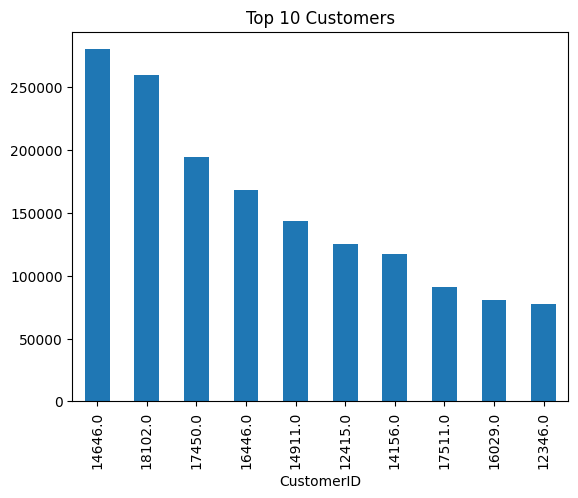

In [45]:
# Sort customers by total spending in descending order
high_value_customers = total_spent.sort_values(ascending=False)
# Display the top 10 high-value customers
top_10_high_value_customers = high_value_customers.head(10)
print(top_10_high_value_customers)
top_10_high_value_customers.plot(kind='bar')
plt.title("Top 10 Customers")
#high_value_customers.sort_values(ascending=False)

CustomerID
13256.0     0.00
16738.0     3.75
14792.0     6.20
16454.0     6.90
17956.0    12.75
16878.0    13.30
13307.0    15.00
17763.0    15.00
15823.0    15.00
16093.0    17.00
dtype: float64


Text(0.5, 1.0, 'Bottom 10 Customers')

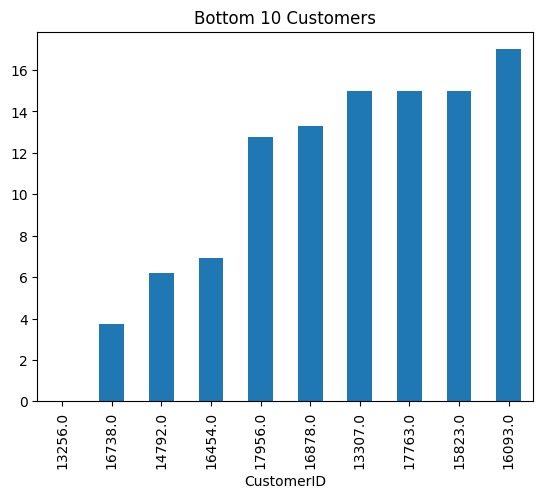

In [46]:
high_value_customers = total_spent.sort_values(ascending=True)
# Display the top 10 high-value customers
top_10_high_value_customers = high_value_customers.head(10)
print(top_10_high_value_customers)
top_10_high_value_customers.plot(kind='bar')
plt.title("Bottom 10 Customers")

customer_loyalty_max 7676
customer_loyalty_min 1
customer_loyalty_avg 90.51209956211109
customer_loyalty_std 225.515328160437


CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

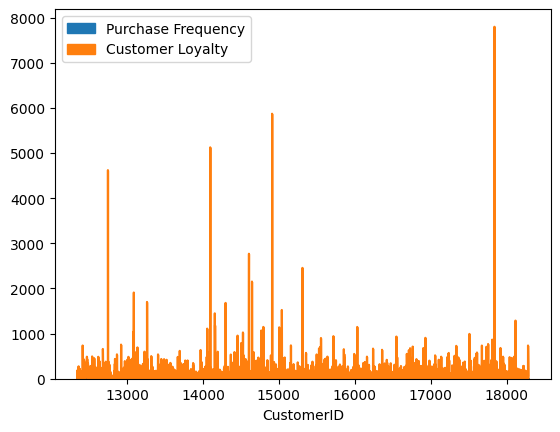

In [47]:
# Calculate customer loyalty (number of purchases per customer)
customer_loyalty = data.groupby('CustomerID')['InvoiceNo'].count()

# Calculate purchase frequency per customer
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a DataFrame to store the purchase frequency and customer loyalty
purchase_analysis = pd.DataFrame({
    'Purchase Frequency': purchase_frequency,
    'Customer Loyalty': customer_loyalty
})
print('customer_loyalty_max',customer_loyalty.max())
print('customer_loyalty_min',customer_loyalty.min())
print('customer_loyalty_avg',customer_loyalty.mean())
print('customer_loyalty_std',customer_loyalty.std())
purchase_analysis.plot(kind='area')
customer_loyalty

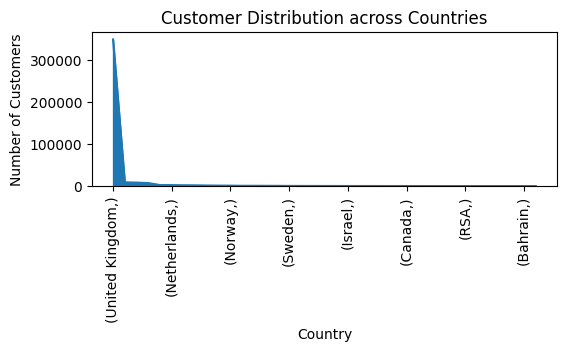

In [48]:
customer_distribution=data[['Country']].value_counts() # count customer in each country.

# Plot the area plot
plt.figure(figsize=(6, 2))
customer_distribution.plot(kind='area')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution across Countries')
plt.xticks(rotation=90)
plt.show()

#  Customer segmentation based on purchasing behavior

Customer Segmentation:
            Total Invoices  Total Quantity  Total Spend  Total Countries
CustomerID                                                              
12346.0                  1           74215         1.04                1
12347.0                  7            2458       481.21              182
12348.0                  4            2341       178.71               31
12349.0                  1             631       605.10               73
12350.0                  1             197        65.30               17
12352.0                  8             536      1354.11               85
12353.0                  1              20        24.30                4
12354.0                  1             530       261.22               58
12355.0                  1             240        54.65               13
12356.0                  3            1591       188.87               59


<Axes: xlabel='CustomerID'>

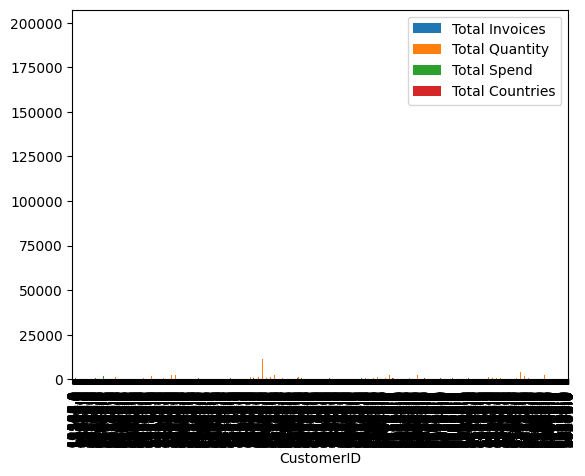

In [68]:
customer_segmentation = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'sum',
    'Country'  :'count'
})
customer_segmentation.rename(columns={'InvoiceNo': 'Total Invoices', 'Quantity': 'Total Quantity', 'UnitPrice': 'Total Spend','Country':'Total Countries'}, inplace=True)
print("Customer Segmentation:")
print(customer_segmentation.head(10))
customers=customer_segmentation.value_counts().sort_values(ascending=False)
customer_segmentation.plot(kind='bar')

<Axes: xlabel='CustomerID'>

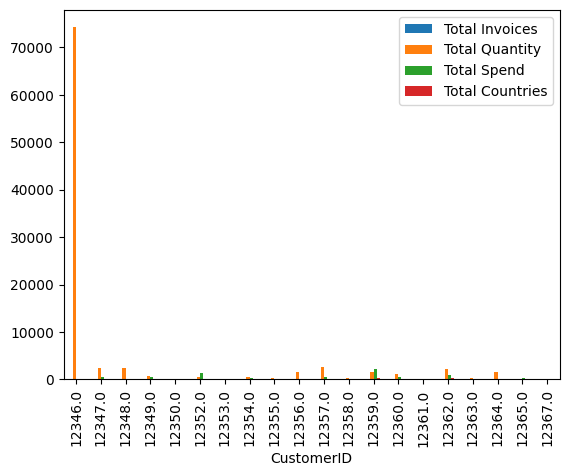

In [78]:
customer_segmentation.head(20).plot(kind='bar')

In [55]:
customer=pd.DataFrame(customers)
customer


count
Total Invoices Total Quantity Total Spend Total Countries       
1              72             1.06        1                    4
               12             5.90        2                    2
                              5.95        1                    2
               2              12.75       1                    2
               10             2.08        1                    2
...                                                          ...
63             40108          8720.65     241                  1
74             197491         5176.09     2080                 1
86             9289           704.65      305                  1
91             38147          5939.21     2366                 1
210            25288          11788.31    4413                 1

[4327 rows x 1 columns]

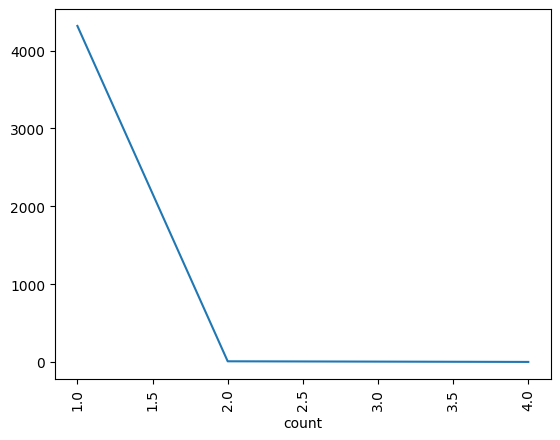

count
1    4317
2       9
4       1
Name: count, dtype: int64


In [85]:
customers.value_counts().plot()
plt.xticks(rotation=90)
plt.show()
print(customers.value_counts())

# I has Calculated and analyze key customer metrics such as:

   - Total purchases per customer

   - Average purchase value per customer

   - Number of unique products purchased per customer

   - Identify high-value customers based on their total purchase value.

   - Analyze the frequency of purchases by customers to understand customer loyalty.

   -  Determine the distribution of customers across different countries.

# Time Analysis:
- Convert InvoiceDate to datetime format
- Analyze purchase distribution over time (e.g., month, day of the week)
- Calculate metrics like average purchase value and total sales per time period

- By converting 'InvoiceDate' to datetime format, you can perform various
- date-based analyses and manipulations on the column, 
- such as extracting the year, month, or day, calculating time differences, and more.

In [86]:
# Convert 'InvoiceDate' column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#Verify the updated DataFrame
data.head()

C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\2132471711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Code,Type,EncodedType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123,1,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,2,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406,2,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029,7,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029,5,5


Purchase Distribution by Month: Month
1     20991
2     19707
3     26872
4     22435
5     28075
6     26926
7     26582
8     26796
9     39671
10    48796
11    63182
12    42699
Name: count, dtype: int64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\1469506584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfWeek']=pd.DatetimeIndex(data['InvoiceDate']).day
C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\1469506584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=pd.DatetimeIndex(data['InvoiceDate']).month
C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\1469506584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

<Axes: xlabel='Month'>

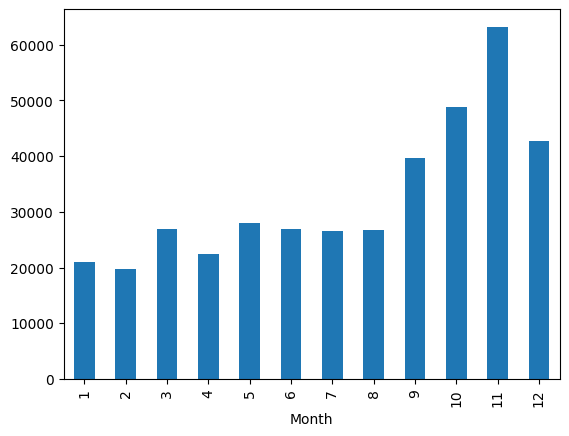

In [87]:
# Extract month and day of the week from 'InvoiceDate'
#Creating year,month and days columns:
data['DayOfWeek']=pd.DatetimeIndex(data['InvoiceDate']).day
data['Month']=pd.DatetimeIndex(data['InvoiceDate']).month
data['Year']=pd.DatetimeIndex(data['InvoiceDate']).year
data.columns
# Analyze purchase distribution by day of the week
purchase_by_dayofweek = data['DayOfWeek'].value_counts().sort_index()

#print("\nPurchase Distribution by Day of the Week:",purchase_by_dayofweek)
# Analyze purchase distribution by month
purchase_by_month = data['Month'].value_counts().sort_index()
print("Purchase Distribution by Month:",purchase_by_month)
purchase_by_month.plot(kind='bar')


Total Sales per Month: Month
1      66234.650
2      62619.480
3      87864.790
4      78543.481
5     101500.910
6      84602.660
7      75454.521
8      78877.090
9     118160.322
10    164084.090
11    182340.090
12    127239.300
Name: UnitPrice, dtype: float64


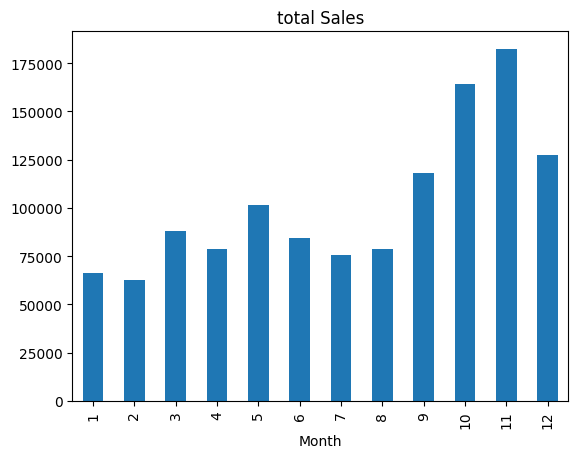

In [88]:
# Calculate total sales per time period
total_sales = data.groupby('Month')['UnitPrice'].sum()
total_sales.plot(kind='bar')
plt.title("total Sales")
# Display the calculated metrics
print("\nTotal Sales per Month:",total_sales)


Average Purchase Value per Month: Month
1     3.155383
2     3.177525
3     3.269753
4     3.500935
5     3.615349
6     3.142043
7     2.838557
8     2.943614
9     2.978506
10    3.362655
11    2.885950
12    2.979913
Name: UnitPrice, dtype: float64


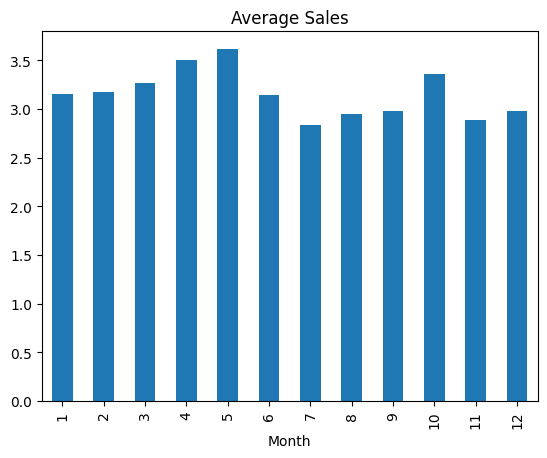

In [89]:
# Calculate average purchase value per time period
average_purchase_value = data.groupby('Month')['UnitPrice'].mean()
average_purchase_value.plot(kind='bar')
plt.title("Average Sales")
# Display the calculated metrics
print("Average Purchase Value per Month:",average_purchase_value)

In [90]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Code', 'Type', 'EncodedType',
       'DayOfWeek', 'Month', 'Year'],
      dtype='object')

Monthly Sales: Month
1     348522
2     265043
3     347623
4     291369
5     372948
6     363014
7     367372
8     398190
9     543654
10    591551
11    678760
12    597840
Name: Quantity, dtype: int64


<Axes: xlabel='Month'>

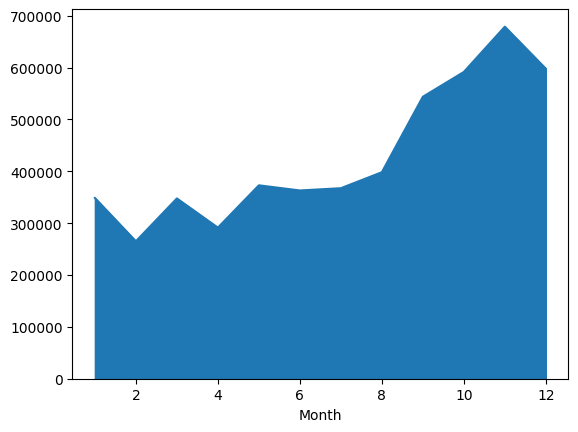

In [91]:
 #Seasonal trends

monthly_sales = data.groupby('Month')['Quantity'].sum()
print("Monthly Sales:",monthly_sales)
monthly_sales.plot(kind='area')

<Axes: xlabel='Year'>

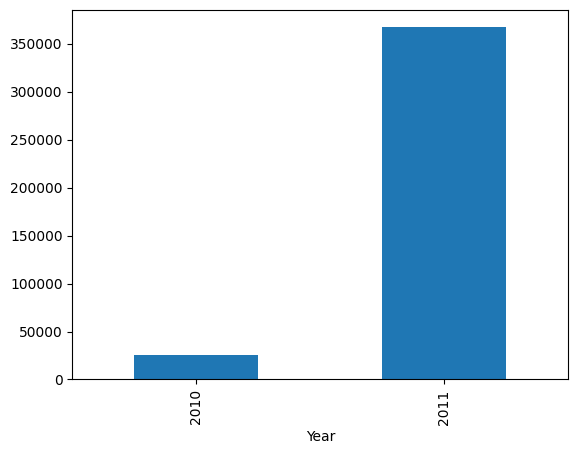

In [92]:
data['Year'].value_counts().sort_index().plot(kind='bar')

- Extracted meaningful insights from the InvoiceDate column by converting it to datetime format.

- Analyzed the distribution of purchases over time (e.g., by month, day of the week) to identify any seasonality or trends in customer behavior.

- Calculated and analyze metrics such as average purchase value and total sales per time period.

# Product Analysis
- Identify top-selling products based on quantity sold and revenue generated
- Analyze the relationship between product price and quantity sold
- Explore product descriptions and identify popular categories


Top-selling Products based on Revenue Generated: Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\2971871806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Quantity'] * data['UnitPrice']


Text(0.5, 1.0, 'selling Products based on Revenue Generated')

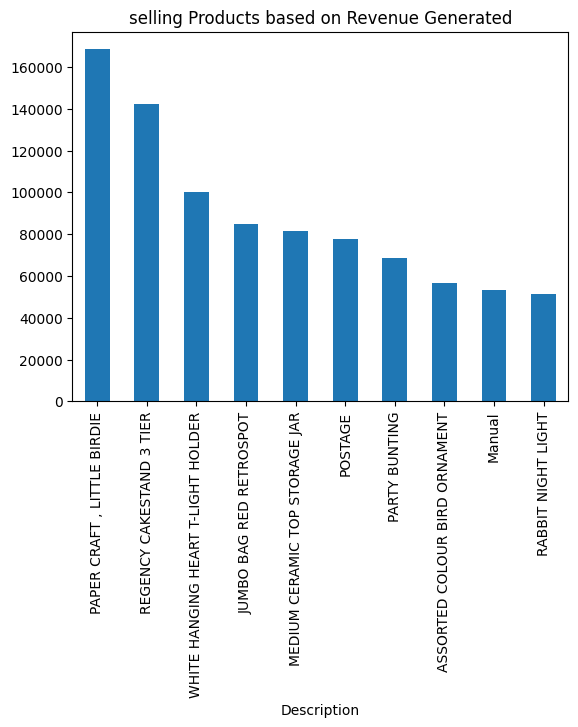

In [93]:
# Identify top-selling products based on revenue generated
data['Revenue'] = data['Quantity'] * data['UnitPrice']
top_products_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Display the top-selling products
print("\nTop-selling Products based on Revenue Generated:",top_products_revenue)

top_products_revenue.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('selling Products based on Revenue Generated')

Top-selling Products based on Quantity Sold: Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Top10-selling Products based on Quantity Sold')

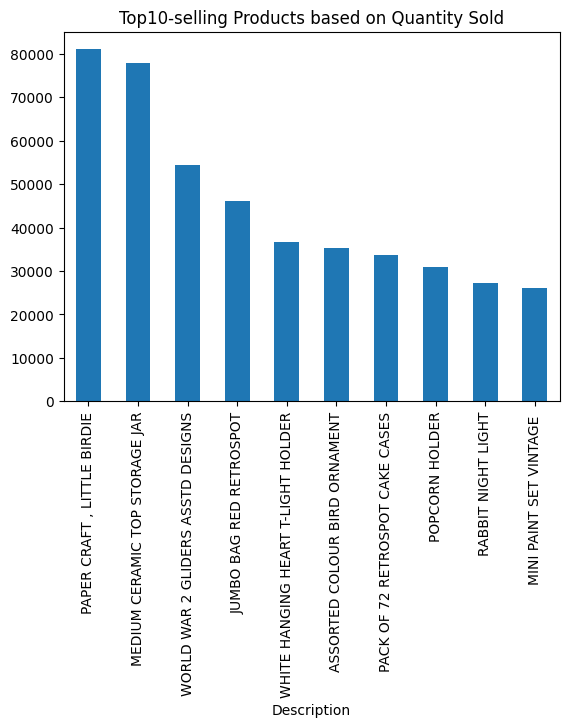

In [94]:
 #Identify top-selling products based on quantity sold
top10_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display the top-selling products
print("Top-selling Products based on Quantity Sold:",top10_products_quantity)


top10_products_quantity.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Top10-selling Products based on Quantity Sold')


Least10-selling Products based on Quantity Sold: Description
BLOSSOM IMAGES SCRAP BOOK SET          1
PACK 4 FLOWER/BUTTERFLY PATCHES        1
BLACK DROP EARRINGS W LONG BEADS       1
VINTAGE BEAD PINK JEWEL STAND          1
SET/3 FLORAL GARDEN TOOLS IN BAG       1
WHITE ROSEBUD  PEARL EARRINGS          1
WHITE STONE/CRYSTAL EARRINGS           1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
CROCHET DOG KEYRING                    1
CAKE STAND LACE WHITE                  1
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Least10-selling Products based on Quantity Sold')

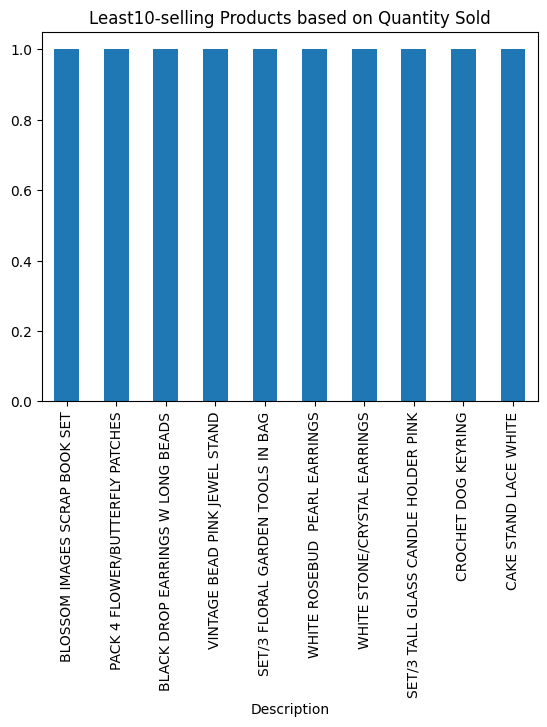

In [95]:
 #Identify top-selling products based on quantity sold
Bottom10_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

# Display the top-selling products
print("Least10-selling Products based on Quantity Sold:",Bottom10_products_quantity)


Bottom10_products_quantity.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Least10-selling Products based on Quantity Sold')


# Relationship between product price and quantity sold
- more Quqntity Sold products are having Lesser Product Price .
- lesser Quqntity Sold products are having higher Product Price .

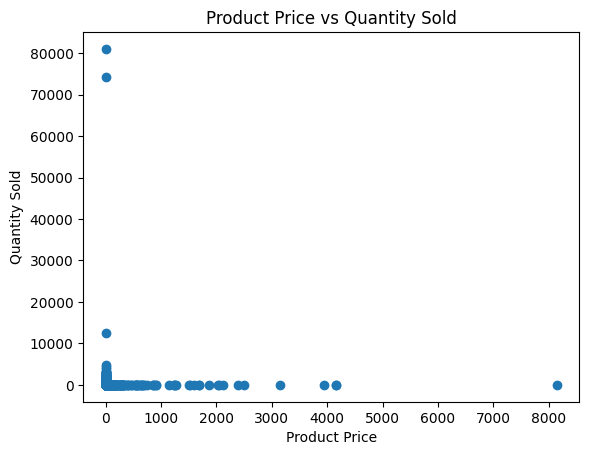

In [96]:
# Plot the relationship between product price and quantity sold
plt.scatter(data['UnitPrice'], data['Quantity'])
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.title('Product Price vs Quantity Sold')
plt.show()

Popular Categories: Category
SET        25749
JUMBO      14199
RED        14057
LUNCH      12248
PACK       10231
VINTAGE     8178
PINK        7060
DOORMAT     6741
BLUE        5649
WOODEN      5433
Name: count, dtype: int64


C:\Users\vijay\AppData\Local\Temp\ipykernel_15744\1547822158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'] = data['Description'].str.split().str[0]


Text(0.5, 1.0, 'Most Popular Categories')

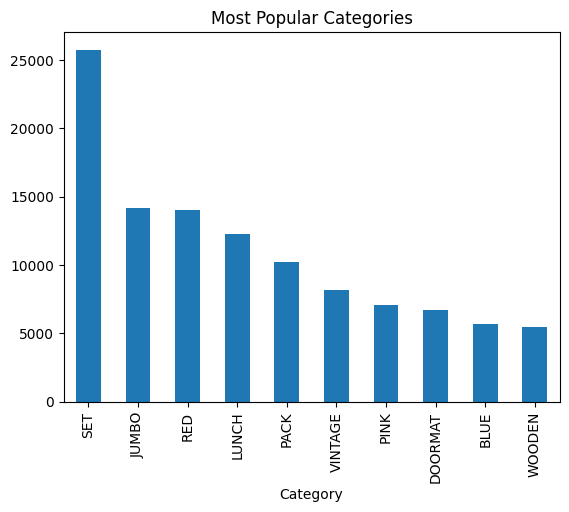

In [97]:
# Extract category from product descriptions
data['Category'] = data['Description'].str.split().str[0]

# Count the occurrences of each category
popular_categories = data['Category'].value_counts().head(10)

# Display the popular categories
print("Popular Categories:",popular_categories)

popular_categories.plot(kind='bar')
plt.title("Most Popular Categories")

In [98]:
# Cross-selling opportunities
cross_selling = data.groupby('InvoiceNo')['Description'].unique()
print("Cross-selling Opportunities:",cross_selling.head(10))


Cross-selling Opportunities: InvoiceNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
536370    [ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
536371                    [PAPER CHAIN KIT 50'S CHRISTMAS ]
536372    [HAND WARMER RED POLKA DOT, HAND WARMER UNION ...
536373    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536374                         [VICTORIAN SEWING BOX LARGE]
Name: Description, dtype: object


In [99]:
pricing_analysis = data.groupby('Description').agg({'UnitPrice': 'mean', 'Quantity': 'sum'})
pricing_analysis['Revenue'] = pricing_analysis['UnitPrice'] * pricing_analysis['Quantity']
top_selling_products = pricing_analysis.sort_values(by='Quantity', ascending=False).head(10)
print("Top Selling Products (Based on Quantity Sold):")
print(top_selling_products)

Top Selling Products (Based on Quantity Sold):
                                    UnitPrice  Quantity        Revenue
Description                                                           
PAPER CRAFT , LITTLE BIRDIE          2.080000     80995  168469.600000
MEDIUM CERAMIC TOP STORAGE JAR       1.220303     77916   95081.130909
WORLD WAR 2 GLIDERS ASSTD DESIGNS    0.292606     54319   15894.061631
JUMBO BAG RED RETROSPOT              2.015969     46078   92891.821437
WHITE HANGING HEART T-LIGHT HOLDER   2.892768     36706  106181.936964
ASSORTED COLOUR BIRD ORNAMENT        1.680710     35263   59266.865355
PACK OF 72 RETROSPOT CAKE CASES      0.548181     33670   18457.252667
POPCORN HOLDER                       0.843231     30919   26071.866723
RABBIT NIGHT LIGHT                   2.012770     27153   54652.753378
MINI PAINT SET VINTAGE               0.656523     26076   17119.495754


# Customer loyalty

Customer Loyalty:
CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64


<Axes: xlabel='CustomerID'>

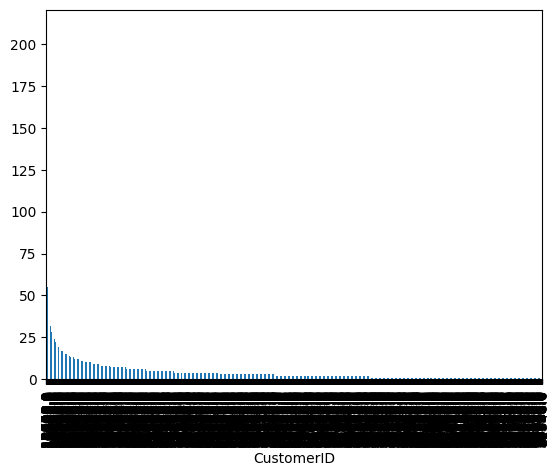

In [100]:
customer_loyalty = data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print("Customer Loyalty:")
print(customer_loyalty.head(10))
customer_loyalty.plot(kind='bar')

StockCode
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
20678        1
90059D       1
90168        1
90169        1
23843        1
Name: count, Length: 3665, dtype: int64

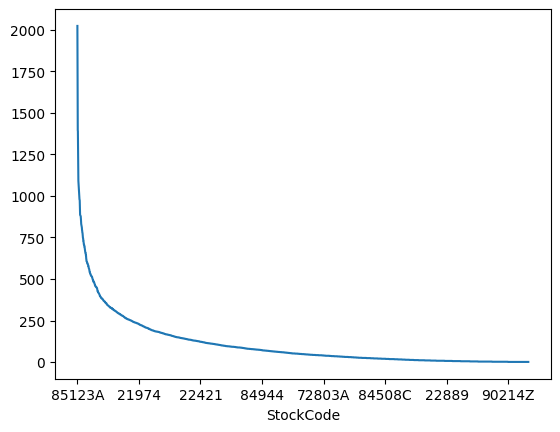

In [110]:
data['StockCode'].value_counts().plot()
data['StockCode'].value_counts()

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: count, dtype: int64

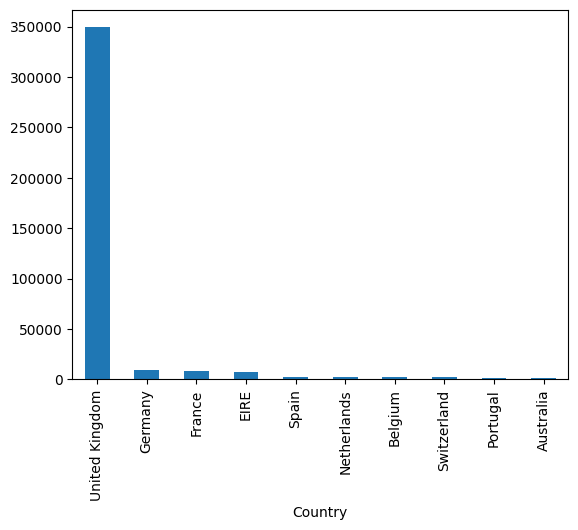

In [128]:
#counries=data['Country'].value_counts().sort_values().plot()
countries=data['Country'].value_counts().sort_values(ascending=False)
topcontries=countries.head(10).plot(kind='bar')
plt.xticks()
data['Country'].value_counts().sort_values(ascending=False).head(10)

# Customer Segmentation
- Preprocess data (scaling, normalization)
- Determine the optimal number of clusters
- Perform K-means clustering
- Analyze customer segments and assign labels

# Preprocess data (scaling, normalization)

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Select only the numeric columns for scaling
numeric_columns = data.select_dtypes(include=[np.number]).columns
print(numeric_columns)

# Scale the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])
print(scaled_data)

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Code', 'Type',
       'EncodedType', 'DayOfWeek', 'Month', 'Year', 'Revenue'],
      dtype='object')
[[-1.85114137e+00 -3.93952829e-02 -2.58802830e-02 ...  1.28785993e+00
  -3.78119982e+00 -2.35602495e-02]
 [-1.85114137e+00 -3.93952829e-02  1.18883176e-02 ...  1.28785993e+00
  -3.78119982e+00 -7.35878912e-03]
 [-1.85114137e+00 -2.83813507e-02 -1.68877590e-02 ...  1.28785993e+00
  -3.78119982e+00 -2.02259385e-03]
 ...
 [ 1.60432238e+00 -5.04092151e-02  4.60599086e-02 ...  1.28785993e+00
   2.64466320e-01 -1.93813014e-02]
 [ 1.60432238e+00 -5.04092151e-02  4.60599086e-02 ...  1.28785993e+00
   2.64466320e-01 -1.93813014e-02]
 [ 1.60432238e+00 -5.59161813e-02  8.20300044e-02 ...  1.28785993e+00
   2.64466320e-01 -2.50068084e-02]]


In [130]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[numeric_columns])
normalized_data

array([[0.00000000e+00, 6.17329679e-05, 3.13162015e-04, ...,
        1.00000000e+00, 0.00000000e+00, 9.08175718e-05],
       [0.00000000e+00, 6.17329679e-05, 4.16321267e-04, ...,
        1.00000000e+00, 0.00000000e+00, 1.20733948e-04],
       [0.00000000e+00, 8.64261550e-05, 3.37723742e-04, ...,
        1.00000000e+00, 0.00000000e+00, 1.30587358e-04],
       ...,
       [1.00000000e+00, 3.70397807e-05, 5.09655829e-04, ...,
        1.00000000e+00, 1.00000000e+00, 9.85340975e-05],
       [1.00000000e+00, 3.70397807e-05, 5.09655829e-04, ...,
        1.00000000e+00, 1.00000000e+00, 9.85340975e-05],
       [1.00000000e+00, 2.46931871e-05, 6.07902736e-04, ...,
        1.00000000e+00, 1.00000000e+00, 8.81464668e-05]])

In [131]:
scaler = RobustScaler()
Robust_scaled_data = scaler.fit_transform(data[numeric_columns])
Robust_scaled_data

array([[-1.11749244,  0.        ,  0.24      , ...,  0.66666667,
        -1.        ,  0.1959596 ],
       [-1.11749244,  0.        ,  0.576     , ...,  0.66666667,
        -1.        ,  0.53535354],
       [-1.11749244,  0.2       ,  0.32      , ...,  0.66666667,
        -1.        ,  0.64713805],
       ...,
       [ 0.8635826 , -0.2       ,  0.88      , ...,  0.66666667,
         0.        ,  0.28350168],
       [ 0.8635826 , -0.2       ,  0.88      , ...,  0.66666667,
         0.        ,  0.28350168],
       [ 0.8635826 , -0.3       ,  1.2       , ...,  0.66666667,
         0.        ,  0.16565657]])

In [132]:
data.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Code,Type,EncodedType,DayOfWeek,Month,Year,Revenue
count,392732.000000,392732.000000,392732,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,30957.664255,2.255133,2.255133,15.044651,7.601935,2010.934630,22.629195
min,536365.000000,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,0.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,22029.000000,2.000000,2.000000,7.000000,5.000000,2011.000000,4.950000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,22667.000000,2.000000,2.000000,15.000000,8.000000,2011.000000,12.390000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,23283.000000,2.000000,2.000000,22.000000,11.000000,2011.000000,19.800000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,90214.000000,24.000000,24.000000,31.000000,12.000000,2011.000000,168469.600000
std,13087.116747,181.588420,NaN,22.240725,1713.567773,20839.157088,1.737420,1.737420,8.652557,3.415023,0.247178,311.083465


# Taking small amount of data withn 1000 records to run the code for short period of time.

- data_1000 = df.sample(n=1000, random_state=42) data_1000.head()

In [133]:
data_test = data.sample(n=1000, random_state=42) 
data_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Code,Type,EncodedType,DayOfWeek,Month,Year,Revenue,Category
227549,556882,82582,AREA PATROLLED METAL SIGN,6,2011-06-15 12:21:00,2.10,14395.0,United Kingdom,82582,2,2,15,6,2011,12.60,AREA
517145,580033,20713,JUMBO BAG OWLS,10,2011-12-01 12:18:00,2.08,14282.0,United Kingdom,20713,2,2,1,12,2011,20.80,JUMBO
382750,569943,20961,STRAWBERRY BATH SPONGE,5,2011-10-06 18:08:00,1.25,14592.0,United Kingdom,20961,2,2,6,10,2011,6.25,STRAWBERRY
83309,543300,47310M,"SMALL POP BOX,FUNKY MONKEY",3,2011-02-07 11:42:00,1.25,13334.0,United Kingdom,47310,13,13,7,2,2011,3.75,SMALL
3708,536643,22634,CHILDS BREAKFAST SET SPACEBOY,2,2010-12-02 11:57:00,9.95,14390.0,United Kingdom,22634,2,2,2,12,2010,19.90,CHILDS


In [134]:
customer_metrics = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Number of unique invoices per customer
    'Quantity': 'sum',          # Total quantity purchased per customer
    'UnitPrice': 'sum'              # Total spend per customer
})
customer_metrics
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_metrics)
scaled_data

array([[-0.42467487, 14.45293971, -0.32201021],
       [ 0.35408019,  0.25084866,  0.22655054],
       [-0.03529734,  0.22769211, -0.11903463],
       ...,
       [-0.29488236, -0.21525116, -0.25192212],
       [ 1.52221279,  0.03293957,  1.01839182],
       [-0.16508985,  0.07826308, -0.20375726]])

# Determine the optimal number of clusters:
1.To find the optimal number of clusters, we can use techniques like the elbow method or silhouette score.

2.The elbow method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the point where the change in WCSS begins to level off.

3.The silhouette score measures the compactness and separation of the clusters. Higher scores indicate better-defined clusters.

# Elbow Method:

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [136]:
# Check the number of rows in the DataFrame
num_rows = len(scaled_data)

# Specify the desired sample size
sample_size = 1000

# Check if the sample size is larger than the number of rows
if sample_size > num_rows:
    # If the sample size is larger, set it to the number of rows
    sample_size = num_rows

# Sample from the DataFrame
sample = data.sample(n=sample_size, random_state=42)

# Display the head of the sample
sample.head(2)
sample.shape

(1000, 16)

In [137]:
# Initialize an empty list to store the inertia values
inertia = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    



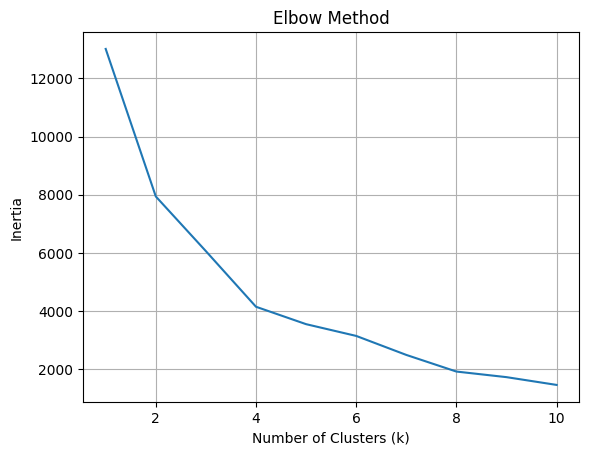

In [138]:
# Plot the inertia values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

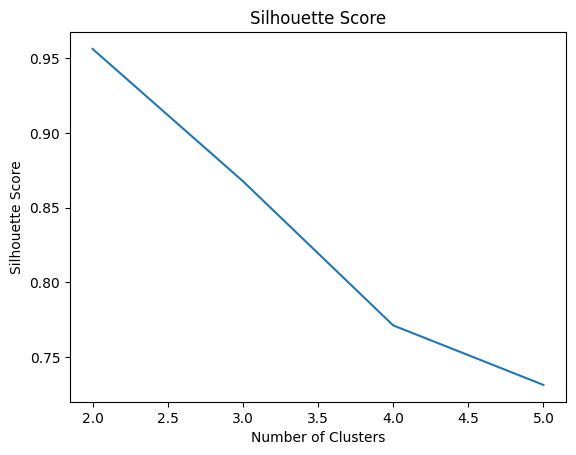

In [139]:
max_clusters = 5  # Maximum number of clusters to try
silhouette_scores = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
        
        # Plot the silhouette scores
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


        

In [140]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
max_score = max(silhouette_scores)
min_score = min(silhouette_scores)
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Max Silhouette Score: {max_score}")
print(f"Min Silhouette Score: {min_score}")


Optimal Number of Clusters: 2
Max Silhouette Score: 0.9564148929494246
Min Silhouette Score: 0.7312505772302037


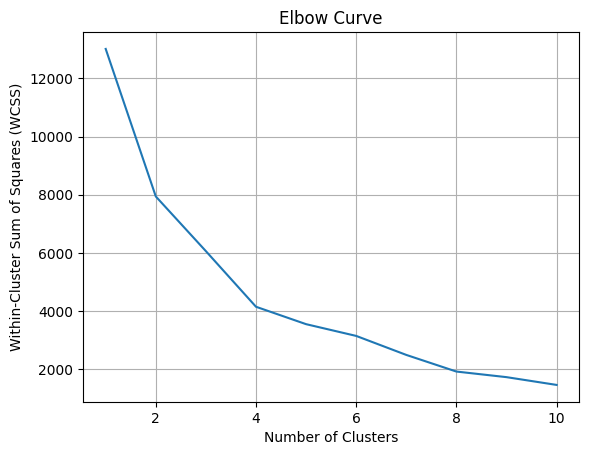

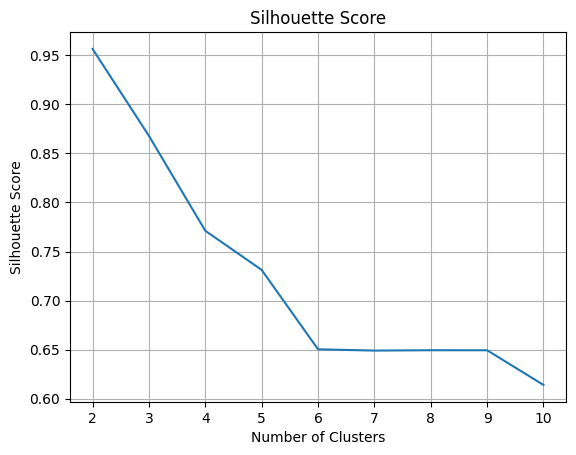

In [141]:
# Perform K-means clustering with different numbers of clusters
max_clusters = 10  # Maximum number of clusters to try
inertias = []
silhouette_scores = []

for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
        
        
        
# Plot the elbow curve
plt.plot(range(1, max_clusters+1), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

# Plot the silhouette scores
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.title('Silhouette Score')
plt.show()

# From Above  Segmentations Model We Can Consider 4 No. of Clusters for Segmenting the data Values into 4 Clusters.

# -----------------------Completed---------------------------